In [148]:

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [150]:
! ls ../data
%pylab inline


expense.csv
Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_csv('../data/expense.csv')
df.head()

,age,expense,gender
0,33,151.629329,F
1,26,88.002924,F
2,31,538.996985,F
3,30,143.505742,F
4,24,35.997773,M


In [95]:
# plot scatter and fitted line
fig = figure()
plt.scatter(df.age,df.expense, marker = 'o', alpha =0.3)
fit = np.polyfit(df.age, df.expense, 1)
fitfunc = np.poly1d(fit)
#print fitfunc([50,60])
plt.plot(df.age, fitfunc(list(df.age)), color='r')
plt.ylim(0,2000)
plt.ylabel('expenses')
plt.xlabel('age')
py.iplot_mpl(fig)

In [152]:
trace1 = Scatter(
    x=df.age,
    y=df.expense,
    mode = 'markers',
    marker=Marker(
        color='b' ,
        opacity=0.4
                 )
)
trace2 = Scatter(
    x=df.age,
    y=fitfunc(list(df.age)),
    mode='lines',
    line=Line(
        color='red'
    )
)
data = Data([trace1,trace2])
layout = Layout(
    title='Age vs. Expense',
    xaixs = XAxis(
        title='Age'
    ),
    yaxis = YAxis(
        title = 'Expense'
    ),
    showlegend=False
)
fig = Figure(data=data, layout=layout)
py.iplot(fig)

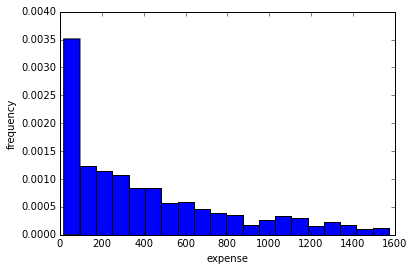

In [35]:

plt.hist(df.expense, bins = 20,normed=True)
plt.xlabel('expense')
plt.ylabel('frequency')
print ''

In [153]:
data = Data([
    Histogram(
        x=df.expense,
        histnorm = 'probability density',
        nbinsx = 20,
        marker = Marker(color ='blue')
        )
    ])
layout = Layout(
    xaxis = XAxis(
        title='expense'
    ),
    yaxis = YAxis(
        title='frequency'
    )
)
fig2 = Figure(data=data, layout=layout)
py.iplot(fig2)


In [67]:
cnt_gender = (df.groupby('gender').size()/len(df.index))
sorted_index = sorted(cnt_gender.index,reverse=True)
cnt_gender = cnt_gender[sorted_index]
cnt_gender_gt800 = df[df.expense>800].groupby('gender').size()/len(df[df.expense>800].index)
cnt_gender_gt800 = cnt_gender_gt800[sorted_index]
print cnt_gender
print cnt_gender_gt800

M    0.361818
F    0.638182
dtype: float64
M    0.684211
F    0.315789
dtype: float64


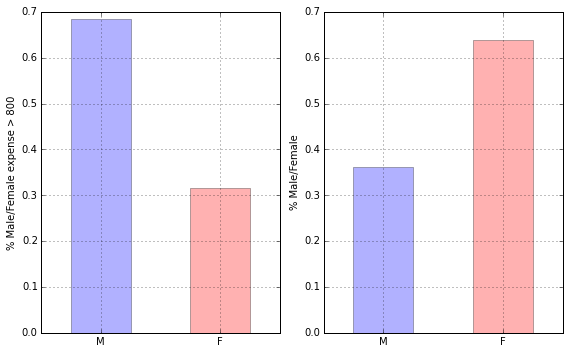

In [93]:
f, (ax_l, ax_r) = plt.subplots(1,2,figsize=(8,5))
f.subplots_adjust(left=0.15)
cnt_gender_gt800.plot(kind='bar', ax = ax_l, colors='br', alpha=0.3)
ax_l.set_ylabel('% Male/Female expense > 800')
ax_l.set_xticklabels(sorted_index,rotation =0)
cnt_gender.plot(kind='bar', ax = ax_r,colors='br', alpha=0.3)
ax_r.set_ylabel('% Male/Female')
ax_r.set_xticklabels(sorted_index, rotation=0)
plt.tight_layout()

In [164]:
trace1 = Bar(
    x = list(cnt_gender_gt800.index),
    y = list(cnt_gender_gt800.values)
)
layout = Layout(
    yaxis = YAxis(
        title = '% Male/Female - expense > $800'
        ),
    showlegend=False
)
data = Data([trace1])
fig3 = Figure(data=data, layout=layout)
py.iplot(fig3)

In [158]:
print list(cnt_gender_gt800.index),
print list(cnt_gender_gt800.values)

['M', 'F'] [0.68421052631578949, 0.31578947368421051]


In [186]:
def make_trace(x, y, col):
    return  Bar(\
    x = x,\
    y = y,
    opacity = 0.4,
    marker = Marker(
        color = col
        )       
               )
x = cnt_gender.index
y = cnt_gender.values
y2 = cnt_gender_gt800.values
c = ['red','blue']
trace1 = [make_trace(x[i],y[i], c[i]) for i in range(2)]
#trace2 = [make_trace(x[i],y2[i], c[i]) for i in range(2)]
#data = Data([trace1, trace2])
data=Data(trace1)
layout = Layout(
    yaxis = YAxis(
        title = '% Male/Female - expense '
        ),
    #yaxis2 = YAxis(
    #title = '% Male/Female - expense > $800'
    #    ),
    showlegend=False
)
f = Figure(data = data, layout= layout)
py.iplot(f)